In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
file = open('./Data/WhatsApp Chat with Bse_Nse 🤑.txt', 'r', encoding='utf-8')

In [3]:
data = file.read()

In [4]:
print(data)

01/12/22, 8:14 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
18/02/20, 2:57 pm - +91 99300 08006 created group "Bse/Nse 🤑"
01/12/22, 8:14 pm - Sahil added you
01/12/22, 8:14 pm - The message timer was updated. New messages will disappear from this chat 90 days after they're sent, except when kept
01/12/22, 8:38 pm - Sahil added +91 81087 88391
02/12/22, 9:23 am - Sahil added +91 99307 73437
04/12/22, 6:39 pm - +91 99207 59735 joined using this group's invite link
06/12/22, 7:23 am - +91 90298 17203 added +91 80977 55695
12/12/22, 12:37 pm - +91 99300 08006 added +91 70211 33751
19/12/22, 11:46 am - +91 99300 08006 added +91 86528 88853
19/12/22, 12:00 pm - Sahil: BO done CMP 199 TARGET 220
19/12/22, 12:16 pm - +91 98216 56959: Shifted to A group also...
19/12/22, 12:28 pm - +91 97685 45595: <Media omitted>
19/12/22, 12:52 pm - +91 97685 45595: <Media omitted>
19/12/22, 12:59 pm - +91 9768

In [5]:
import re

In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s[a-z]{2}\s-\s'

In [7]:
messages = re.split(pattern, data)[1:]
len(messages)

6799

In [8]:
date_time = re.findall(pattern, data)

In [9]:
date_time = [x.replace('\u202f', ' ') for x in date_time]

In [10]:
date_time

['01/12/22, 8:14 pm - ',
 '18/02/20, 2:57 pm - ',
 '01/12/22, 8:14 pm - ',
 '01/12/22, 8:14 pm - ',
 '01/12/22, 8:38 pm - ',
 '02/12/22, 9:23 am - ',
 '04/12/22, 6:39 pm - ',
 '06/12/22, 7:23 am - ',
 '12/12/22, 12:37 pm - ',
 '19/12/22, 11:46 am - ',
 '19/12/22, 12:00 pm - ',
 '19/12/22, 12:16 pm - ',
 '19/12/22, 12:28 pm - ',
 '19/12/22, 12:52 pm - ',
 '19/12/22, 12:59 pm - ',
 '19/12/22, 1:00 pm - ',
 '19/12/22, 1:01 pm - ',
 '19/12/22, 1:03 pm - ',
 '19/12/22, 1:03 pm - ',
 '19/12/22, 1:04 pm - ',
 '19/12/22, 1:04 pm - ',
 '19/12/22, 1:05 pm - ',
 '19/12/22, 1:05 pm - ',
 '19/12/22, 1:05 pm - ',
 '19/12/22, 1:44 pm - ',
 '19/12/22, 1:44 pm - ',
 '19/12/22, 2:19 pm - ',
 '19/12/22, 2:36 pm - ',
 '19/12/22, 2:39 pm - ',
 '19/12/22, 2:43 pm - ',
 '19/12/22, 2:46 pm - ',
 '19/12/22, 2:50 pm - ',
 '19/12/22, 2:50 pm - ',
 '19/12/22, 2:55 pm - ',
 '19/12/22, 2:56 pm - ',
 '19/12/22, 3:02 pm - ',
 '19/12/22, 3:03 pm - ',
 '19/12/22, 3:09 pm - ',
 '19/12/22, 3:10 pm - ',
 '19/12/22, 3:11 p

In [11]:
len(date_time)

6799

In [12]:
df = pd.DataFrame({'USER_MESSAGES' : messages, 'DATE_TIME': date_time})

In [13]:
df.head()

,USER_MESSAGES,DATE_TIME
0,Messages and calls are end-to-end encrypted. N...,"01/12/22, 8:14 pm -"
1,"+91 99300 08006 created group ""Bse/Nse 🤑""\n","18/02/20, 2:57 pm -"
2,Sahil added you\n,"01/12/22, 8:14 pm -"
3,The message timer was updated. New messages wi...,"01/12/22, 8:14 pm -"
4,Sahil added +91 81087 88391\n,"01/12/22, 8:38 pm -"


In [14]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format= '%d/%m/%y, %I:%M %p - ')

In [15]:
df.head()

,USER_MESSAGES,DATE_TIME
0,Messages and calls are end-to-end encrypted. N...,2022-12-01 20:14:00
1,"+91 99300 08006 created group ""Bse/Nse 🤑""\n",2020-02-18 14:57:00
2,Sahil added you\n,2022-12-01 20:14:00
3,The message timer was updated. New messages wi...,2022-12-01 20:14:00
4,Sahil added +91 81087 88391\n,2022-12-01 20:38:00


In [16]:
df['YEAR'] = df.DATE_TIME.dt.year
df['MONTH'] = df.DATE_TIME.dt.month_name()
df['DAY'] = df.DATE_TIME.dt.day
df['HOUR'] = df.DATE_TIME.dt.hour
df['MINUTE'] = df.DATE_TIME.dt.minute

In [17]:
df.head()

,USER_MESSAGES,DATE_TIME,YEAR,MONTH,DAY,HOUR,MINUTE
0,Messages and calls are end-to-end encrypted. N...,2022-12-01 20:14:00,2022,December,1,20,14
1,"+91 99300 08006 created group ""Bse/Nse 🤑""\n",2020-02-18 14:57:00,2020,February,18,14,57
2,Sahil added you\n,2022-12-01 20:14:00,2022,December,1,20,14
3,The message timer was updated. New messages wi...,2022-12-01 20:14:00,2022,December,1,20,14
4,Sahil added +91 81087 88391\n,2022-12-01 20:38:00,2022,December,1,20,38


In [18]:
df.USER_MESSAGES.head(20).to_list()

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 99300 08006 created group "Bse/Nse 🤑"\n',
 'Sahil added you\n',
 "The message timer was updated. New messages will disappear from this chat 90 days after they're sent, except when kept\n",
 'Sahil added +91 81087 88391\n',
 'Sahil added +91 99307 73437\n',
 "+91 99207 59735 joined using this group's invite link\n",
 '+91 90298 17203 added +91 80977 55695\n',
 '+91 99300 08006 added +91 70211 33751\n',
 '+91 99300 08006 added +91 86528 88853\n',
 'Sahil: BO done CMP 199 TARGET 220\n',
 '+91 98216 56959: Shifted to A group also...\n',
 '+91 97685 45595: <Media omitted>\n',
 '+91 97685 45595: <Media omitted>\n',
 '+91 97685 45595: HT media 24 🔥\n\n@21.20🙏🏼\n',
 '+91 97685 45595: 274🔥\n',
 '+91 98677 38599: Varroc🔥\n',
 '+91 96732 71245: Trgt sir?\n',
 '+91 99202 48625: Suzy\n',
 '+91 97685 45595: 24-26-28..\n\nGo with trailing SL\n\nLong t

In [19]:
df[['USERNAME', 'MESSAGE']] = df[df.USER_MESSAGES.str.contains(':')].USER_MESSAGES.str.split(':', 1, expand=True)
df['USERNAME'] = np.where(~df.USER_MESSAGES.str.contains(':'), 'Notification', df['USERNAME'])
df['MESSAGE'] = np.where(~df.USER_MESSAGES.str.contains(':'), df.USER_MESSAGES, df['MESSAGE'])

C:\Users\manth\AppData\Local\Temp\ipykernel_15568\1494843203.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['USERNAME', 'MESSAGE']] = df[df.USER_MESSAGES.str.contains(':')].USER_MESSAGES.str.split(':', 1, expand=True)


In [20]:
df.head(50)

,USER_MESSAGES,DATE_TIME,YEAR,MONTH,DAY,HOUR,MINUTE,USERNAME,MESSAGE
0,Messages and calls are end-to-end encrypted. N...,2022-12-01 20:14:00,2022,December,1,20,14,Notification,Messages and calls are end-to-end encrypted. N...
1,"+91 99300 08006 created group ""Bse/Nse 🤑""\n",2020-02-18 14:57:00,2020,February,18,14,57,Notification,"+91 99300 08006 created group ""Bse/Nse 🤑""\n"
2,Sahil added you\n,2022-12-01 20:14:00,2022,December,1,20,14,Notification,Sahil added you\n
3,The message timer was updated. New messages wi...,2022-12-01 20:14:00,2022,December,1,20,14,Notification,The message timer was updated. New messages wi...
4,Sahil added +91 81087 88391\n,2022-12-01 20:38:00,2022,December,1,20,38,Notification,Sahil added +91 81087 88391\n
5,Sahil added +91 99307 73437\n,2022-12-02 09:23:00,2022,December,2,9,23,Notification,Sahil added +91 99307 73437\n
6,+91 99207 59735 joined using this group's invi...,2022-12-04 18:39:00,2022,December,4,18,39,Notification,+91 99207 59735 joined using this group's invi...
7,+91 90298 17203 added +91 80977 55695\n,2022-12-06 07:23:00,2022,December,6,7,23,Notification,+91 90298 17203 added +91 80977 55695\n
8,+91 99300 08006 added +91 70211 33751\n,2022-12-12 12:37:00,2022,December,12,12,37,Notification,+91 99300 08006 added +91 70211 33751\n
9,+91 99300 08006 added +91 86528 88853\n,2022-12-19 11:46:00,2022,December,19,11,46,Notification,+91 99300 08006 added +91 86528 88853\n


In [21]:
df.MESSAGE.to_list()

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 99300 08006 created group "Bse/Nse 🤑"\n',
 'Sahil added you\n',
 "The message timer was updated. New messages will disappear from this chat 90 days after they're sent, except when kept\n",
 'Sahil added +91 81087 88391\n',
 'Sahil added +91 99307 73437\n',
 "+91 99207 59735 joined using this group's invite link\n",
 '+91 90298 17203 added +91 80977 55695\n',
 '+91 99300 08006 added +91 70211 33751\n',
 '+91 99300 08006 added +91 86528 88853\n',
 ' BO done CMP 199 TARGET 220\n',
 ' Shifted to A group also...\n',
 ' <Media omitted>\n',
 ' <Media omitted>\n',
 ' HT media 24 🔥\n\n@21.20🙏🏼\n',
 ' 274🔥\n',
 ' Varroc🔥\n',
 ' Trgt sir?\n',
 ' Suzy\n',
 ' 24-26-28..\n\nGo with trailing SL\n\nLong term big target possible\n',
 " Can anyone tell me what's the trend for  nifty IT in short term?\n",
 ' <Media omitted>\n',
 ' MTNL 30 🔥\n\n\n\nBooked 

In [22]:
df.shape

(6799, 9)

In [23]:
df.MESSAGE.str.split().str.len().sum()

92725

In [24]:
df[df.MESSAGE == ' <Media omitted>\n']

,USER_MESSAGES,DATE_TIME,YEAR,MONTH,DAY,HOUR,MINUTE,USERNAME,MESSAGE
12,+91 97685 45595: <Media omitted>\n,2022-12-19 12:28:00,2022,December,19,12,28,+91 97685 45595,<Media omitted>\n
13,+91 97685 45595: <Media omitted>\n,2022-12-19 12:52:00,2022,December,19,12,52,+91 97685 45595,<Media omitted>\n
21,+91 98196 88743: <Media omitted>\n,2022-12-19 13:05:00,2022,December,19,13,5,+91 98196 88743,<Media omitted>\n
42,+91 97685 45595: <Media omitted>\n,2022-12-19 15:31:00,2022,December,19,15,31,+91 97685 45595,<Media omitted>\n
43,+971 52 775 9226: <Media omitted>\n,2022-12-19 16:55:00,2022,December,19,16,55,+971 52 775 9226,<Media omitted>\n
44,+91 97685 45595: <Media omitted>\n,2022-12-19 20:52:00,2022,December,19,20,52,+91 97685 45595,<Media omitted>\n
45,+91 97685 45595: <Media omitted>\n,2022-12-19 20:52:00,2022,December,19,20,52,+91 97685 45595,<Media omitted>\n
46,+91 97685 45595: <Media omitted>\n,2022-12-19 20:53:00,2022,December,19,20,53,+91 97685 45595,<Media omitted>\n
47,+91 97685 45595: <Media omitted>\n,2022-12-19 20:55:00,2022,December,19,20,55,+91 97685 45595,<Media omitted>\n
48,Sahil: <Media omitted>\n,2022-12-19 23:31:00,2022,December,19,23,31,Sahil,<Media omitted>\n


In [25]:
cs = ' '.join(df.MESSAGE)

In [93]:
# !pip install urlextract

  Using cached urlextract-1.8.0-py3-none-any.whl (21 kB)
  Using cached filelock-3.10.0-py3-none-any.whl (9.9 kB)
  Using cached uritools-4.0.1-py3-none-any.whl (10 kB)


In [26]:
from urlextract import URLExtract

In [27]:
extractor = URLExtract()
urls = extractor.find_urls(cs)

In [28]:
len(urls)

302

In [29]:
# Dictionary storing emoji counts 
from collections import defaultdict
emoji_count = defaultdict(int)
for i in df['MESSAGE']:
    for emoji in re.findall(u'[\U0001f300-\U0001f650]|[\u2000-\u3000]', i):
        emoji_count[emoji] += 1

print (emoji_count)

defaultdict(<class 'int'>, {'🔥': 600, '🙏': 466, '🏼': 504, '👀': 177, '₹': 54, '😍': 204, '🙈': 25, '✌': 21, '✈': 45, '👍': 115, '👌': 28, '🏻': 187, '👏': 56, '😀': 32, '😂': 212, '😄': 26, '😅': 43, '🙌': 7, '😉': 17, '😊': 11, '’': 225, '\u200d': 40, '♂': 24, '😁': 50, '–': 50, '😝': 6, '😭': 3, '😃': 25, '❤': 27, '☹': 4, '😞': 4, '👆': 41, '📌': 1, '😜': 36, '😎': 81, '😆': 80, '😛': 6, '🙃': 8, '…': 20, '💚': 3, '😲': 1, '🔹': 3, '🔽': 6, '🔼': 5, '😢': 10, '😔': 6, '🙂': 7, '😩': 2, '👎': 3, '🎯': 18, '🙄': 5, '📈': 12, '📉': 1, '⁉': 1, '🕺': 11, '☺': 7, '💯': 9, '💀': 3, '💥': 44, '💎': 9, '🏦': 3, '💰': 1, '💃': 4, '♥': 1, '‘': 21, '🔸': 16, '⚡': 4, '❣': 2, '🏠': 1, '💫': 11, '🎉': 2, '•': 556, '👉': 30, '💪': 4, '⭐': 3, '❔': 4, '😋': 1, '📊': 2, '📮': 2, '👈': 1, '✨': 6, '😯': 1, '😪': 1, '😳': 24, '👇': 10, '🏽': 9, '⬇': 8, '✅': 8, '⬆': 14, '↔': 2, '💸': 6, '⚒': 1, '😇': 6, '😵': 7, '⤵': 1, '🏃': 9, '♀': 8, '🌟': 3, '🐘': 1, '🐎': 1, '🐦': 1, '💐': 3, '🔗': 1, '🐢': 1, '😶': 1, '🎣': 1, '🕯': 1, '✔': 2, '🍻': 1, '🍾': 2, '🍪': 1, '😈': 2, '👂': 1, '☝': 1, '

In [30]:
pd.DataFrame({'Emoji' : emoji_count.keys(), 'Counts' : emoji_count.values()})

,Emoji,Counts
0,🔥,600
1,🙏,466
2,🏼,504
3,👀,177
4,₹,54
5,😍,204
6,🙈,25
7,✌,21
8,✈,45
9,👍,115


In [31]:
dict(sorted(emoji_count.items(), key= lambda x: x[1], reverse=True)[:20])

{'🔥': 600,
 '•': 556,
 '🏼': 504,
 '🙏': 466,
 '’': 225,
 '😂': 212,
 '😍': 204,
 '🏻': 187,
 '👀': 177,
 '👍': 115,
 '😎': 81,
 '😆': 80,
 '👏': 56,
 '₹': 54,
 '😁': 50,
 '–': 50,
 '✈': 45,
 '💥': 44,
 '😅': 43,
 '👆': 41}

In [32]:
df.USERNAME.value_counts().sort_values(ascending=False).nlargest(10)

+91 99300 08006     1371
+91 97685 45595     1253
+91 99879 32886      385
+971 52 775 9226     311
+91 94268 27656      273
+91 98204 88468      245
+91 98338 37772      184
+91 86558 27175      181
Sahil                176
+91 99202 48625      173
Name: USERNAME, dtype: int64

In [33]:
pd.DataFrame({'No. of Messages' : df.USERNAME.value_counts().sort_values(ascending=False).nlargest(10)})

,No. of Messages
+91 99300 08006,1371
+91 97685 45595,1253
+91 99879 32886,385
+971 52 775 9226,311
+91 94268 27656,273
+91 98204 88468,245
+91 98338 37772,184
+91 86558 27175,181
Sahil,176
+91 99202 48625,173


In [34]:
import wordcloud

In [40]:
str_messages = ''
str_messages += " ".join(df.MESSAGE) + " "

In [46]:
str_messages_lower_case = str_messages.lower()

In [48]:
wc = wordcloud.WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = wordcloud.STOPWORDS,
                min_font_size = 10).generate(str_messages_lower_case)

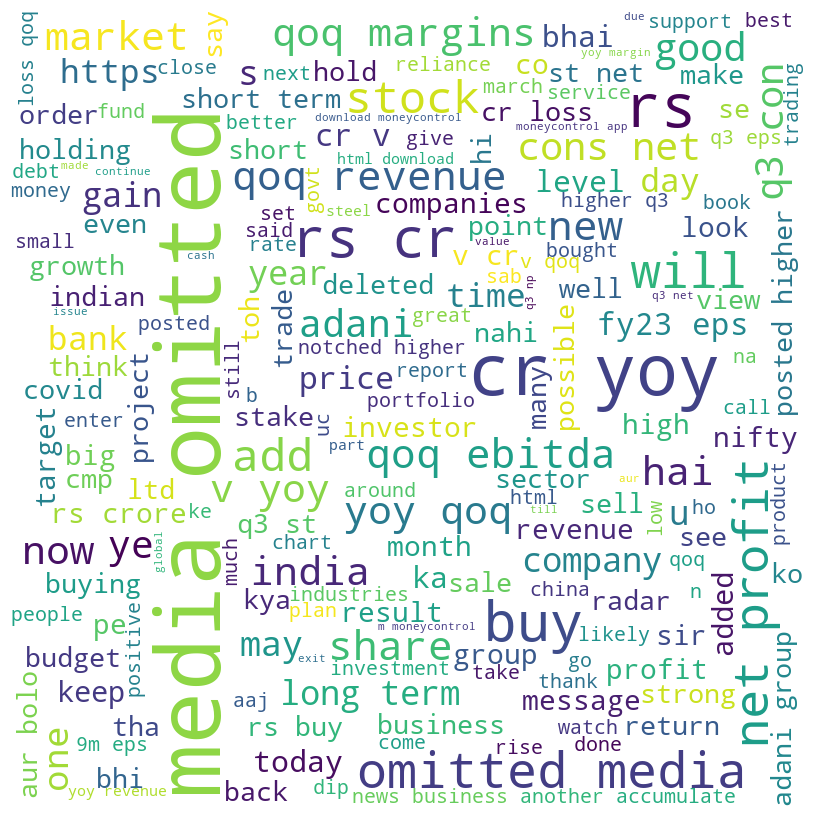

In [50]:
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [52]:
df.head()

,USER_MESSAGES,DATE_TIME,YEAR,MONTH,DAY,HOUR,MINUTE,USERNAME,MESSAGE
0,Messages and calls are end-to-end encrypted. N...,2022-12-01 20:14:00,2022,December,1,20,14,Notification,Messages and calls are end-to-end encrypted. N...
1,"+91 99300 08006 created group ""Bse/Nse 🤑""\n",2020-02-18 14:57:00,2020,February,18,14,57,Notification,"+91 99300 08006 created group ""Bse/Nse 🤑""\n"
2,Sahil added you\n,2022-12-01 20:14:00,2022,December,1,20,14,Notification,Sahil added you\n
3,The message timer was updated. New messages wi...,2022-12-01 20:14:00,2022,December,1,20,14,Notification,The message timer was updated. New messages wi...
4,Sahil added +91 81087 88391\n,2022-12-01 20:38:00,2022,December,1,20,38,Notification,Sahil added +91 81087 88391\n


In [55]:
df["DAY_NAME"] = df.DATE_TIME.dt.day_name()

In [56]:
df.head()

,USER_MESSAGES,DATE_TIME,YEAR,MONTH,DAY,HOUR,MINUTE,USERNAME,MESSAGE,DAY_NAME
0,Messages and calls are end-to-end encrypted. N...,2022-12-01 20:14:00,2022,December,1,20,14,Notification,Messages and calls are end-to-end encrypted. N...,Thursday
1,"+91 99300 08006 created group ""Bse/Nse 🤑""\n",2020-02-18 14:57:00,2020,February,18,14,57,Notification,"+91 99300 08006 created group ""Bse/Nse 🤑""\n",Tuesday
2,Sahil added you\n,2022-12-01 20:14:00,2022,December,1,20,14,Notification,Sahil added you\n,Thursday
3,The message timer was updated. New messages wi...,2022-12-01 20:14:00,2022,December,1,20,14,Notification,The message timer was updated. New messages wi...,Thursday
4,Sahil added +91 81087 88391\n,2022-12-01 20:38:00,2022,December,1,20,38,Notification,Sahil added +91 81087 88391\n,Thursday


In [102]:
day_wise_counts = df.groupby(['DAY_NAME'])['MESSAGE'].count()

In [111]:
day_wise_counts = day_wise_counts.reset_index()
day_wise_counts['DAY_NAME'] = day_wise_counts['DAY_NAME'].apply(lambda x: x[:3])

In [121]:
day_wise_counts.drop(['level_0', 'index'], axis=1, inplace=True)
day_wise_counts.set_index('DAY_NAME', inplace=True)

In [122]:
day_wise_counts

,MESSAGE
DAY_NAME,
Fri,1431
Mon,1127
Sat,262
Sun,221
Thu,1115
Tue,1086
Wed,1557


In [123]:
day_wise_counts.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

,MESSAGE
DAY_NAME,
Mon,1127
Tue,1086
Wed,1557
Thu,1115
Fri,1431
Sat,262
Sun,221


In [98]:
day_wise_counts = df.groupby(['DAY_NAME'])['MESSAGE'].count().reset_index(drop=True).set_index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [99]:
day_wise_counts.values

array([nan, nan, nan, nan, nan, nan, nan])

<Axes: xlabel='DAY_NAME'>

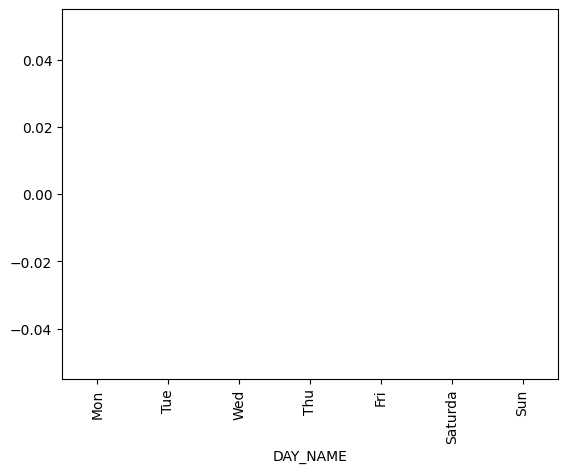

In [100]:
day_wise_counts.plot(kind='bar')

In [74]:
import calendar

In [91]:
df.MONTH.unique()

array(['December', 'February', 'January', 'March'], dtype=object)

In [94]:
df.groupby('MONTH')['MESSAGE'].count()

MONTH
December    1651
February    1789
January     2043
March       1316
Name: MESSAGE, dtype: int64

In [125]:
temp = df[df.USERNAME == 'Sahil'].groupby('MONTH')['MESSAGE'].count()

In [128]:
temp.reset_index()

,MONTH,MESSAGE
0,December,79
1,February,22
2,January,47
3,March,28


In [93]:
month_set = set()
for x in df.MONTH.unique():
    month_set.add(x[:3])


['Dec', 'Feb', 'Jan', 'Mar']